In [6]:
import pandas as pd
import geopandas
%matplotlib inline

In [7]:
parks = pd.read_csv('Parks.csv')
neighborhood_counts = parks['neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.reset_index()
neighborhood_counts.columns = ['neighborhood', 'Count']
neighborhood_counts = neighborhood_counts.sort_values(by='Count', ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [10]:
parks_map = neighborhoods.merge(neighborhood_counts, how='left', left_on='hood', right_on='neighborhood')
parks_map = parks_map.sort_values(by='Count', ascending=False)
parks_map[['hood','Count','geometry']].head()

,hood,Count,geometry
77,East Liberty,12.0,"POLYGON ((-79.91581 40.46088, -79.91580 40.460..."
5,Central Business District,10.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
40,Beechview,8.0,"POLYGON ((-80.02121 40.42342, -80.02111 40.423..."
15,South Side Slopes,7.0,"POLYGON ((-79.99713 40.42920, -79.99547 40.428..."
33,Point Breeze,7.0,"POLYGON ((-79.89526 40.44717, -79.89517 40.447..."


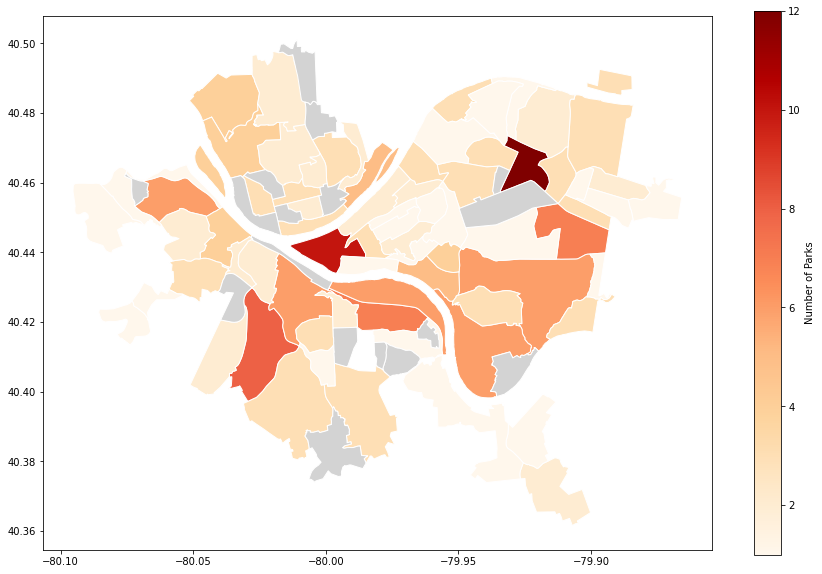

In [12]:
parks_map.plot(column='Count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )